![](https://images.unsplash.com/photo-1630531210974-dab9b07c4eff?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=774&q=80)

# Installs

In [54]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

# Imports

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions

from pycaret  import regression
from sklearn.model_selection import cross_val_score

# Data Loading

In [56]:
# df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df = pd.read_csv('/kaggle/input/stroke-data/stroke.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           333 non-null    int64 
 1   age          333 non-null    int64 
 2   gender       333 non-null    object
 3   left_arm     333 non-null    object
 4   right_arm    333 non-null    object
 5   face         333 non-null    object
 6   directivity  333 non-null    object
 7   trajectory   333 non-null    object
 8   left_leg     333 non-null    object
 9   right_leg    333 non-null    object
 10  labels       333 non-null    object
dtypes: int64(2), object(9)
memory usage: 28.7+ KB


,id,age
count,333.000000,333.000000
mean,167.000000,58.330330
std,96.273049,13.628644
min,1.000000,21.000000
25%,84.000000,48.000000
50%,167.000000,59.000000
75%,250.000000,67.000000
max,333.000000,91.000000


In [57]:
# df.head()

In [58]:
# df.tail()

In [59]:
# df.shape

# EDA

In [60]:
df.nunique()

id             333
age             58
gender           2
left_arm         3
right_arm        3
face             3
directivity      3
trajectory       3
left_leg         4
right_leg        3
labels           2
dtype: int64

In [61]:
df.drop('id', axis = 1, inplace = True)

In [62]:
df.dtypes

age             int64
gender         object
left_arm       object
right_arm      object
face           object
directivity    object
trajectory     object
left_leg       object
right_leg      object
labels         object
dtype: object

In [63]:
# df['bmi'] = df['bmi'].astype(float)

# Handling Categorical Values

In [64]:
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['gender',
 'left_arm',
 'right_arm',
 'face',
 'directivity',
 'trajectory',
 'left_leg',
 'right_leg',
 'labels']

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols: 
    # Encode values in training set
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [66]:
df

,age,gender,left_arm,right_arm,face,directivity,trajectory,left_leg,right_leg,labels
0,67,0,2,2,1,2,2,3,1,0
1,56,1,2,2,2,2,2,3,2,0
2,66,1,2,1,1,1,1,3,2,0
3,51,1,2,1,1,1,1,3,1,0
4,71,0,2,2,1,2,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...
328,61,1,2,2,2,2,2,3,2,1
329,60,0,2,2,0,2,2,3,2,1
330,59,0,2,2,2,2,2,3,2,1
331,38,1,2,2,0,2,2,3,2,1


# Handling Null Values

In [67]:
df.isnull().any()

age            False
gender         False
left_arm       False
right_arm      False
face           False
directivity    False
trajectory     False
left_leg       False
right_leg      False
labels         False
dtype: bool

In [68]:
df.isnull().sum()

age            0
gender         0
left_arm       0
right_arm      0
face           0
directivity    0
trajectory     0
left_leg       0
right_leg      0
labels         0
dtype: int64

In [69]:
df.fillna('29', inplace = True)

In [70]:
df.isnull().sum()

age            0
gender         0
left_arm       0
right_arm      0
face           0
directivity    0
trajectory     0
left_leg       0
right_leg      0
labels         0
dtype: int64

In [71]:
df.isnull().any()

age            False
gender         False
left_arm       False
right_arm      False
face           False
directivity    False
trajectory     False
left_leg       False
right_leg      False
labels         False
dtype: bool

# Correlation

In [72]:
df.corr()

,age,gender,left_arm,right_arm,face,directivity,trajectory,left_leg,right_leg,labels
age,1.000000,-0.036285,-0.043193,0.019454,-0.039824,-0.018848,0.030525,-0.145543,-0.081491,-0.261069
gender,-0.036285,1.000000,-0.046134,-0.063417,-0.112348,-0.037418,0.012722,-0.070507,-0.025774,-0.205520
left_arm,-0.043193,-0.046134,1.000000,0.175981,0.177104,0.190778,0.164305,0.472742,0.019596,0.162615
right_arm,0.019454,-0.063417,0.175981,1.000000,0.123496,0.205311,0.305249,0.040078,0.439008,0.127773
face,-0.039824,-0.112348,0.177104,0.123496,1.000000,0.087055,0.196469,0.140295,0.123496,0.270605
directivity,-0.018848,-0.037418,0.190778,0.205311,0.087055,1.000000,0.574848,0.156071,0.307966,0.321078
trajectory,0.030525,0.012722,0.164305,0.305249,0.196469,0.574848,1.000000,0.151738,0.328901,0.211700
left_leg,-0.145543,-0.070507,0.472742,0.040078,0.140295,0.156071,0.151738,1.000000,0.141844,0.339634
right_leg,-0.081491,-0.025774,0.019596,0.439008,0.123496,0.307966,0.328901,0.141844,1.000000,0.251532
labels,-0.261069,-0.205520,0.162615,0.127773,0.270605,0.321078,0.211700,0.339634,0.251532,1.000000


In [73]:
df

,age,gender,left_arm,right_arm,face,directivity,trajectory,left_leg,right_leg,labels
0,67,0,2,2,1,2,2,3,1,0
1,56,1,2,2,2,2,2,3,2,0
2,66,1,2,1,1,1,1,3,2,0
3,51,1,2,1,1,1,1,3,1,0
4,71,0,2,2,1,2,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...
328,61,1,2,2,2,2,2,3,2,1
329,60,0,2,2,0,2,2,3,2,1
330,59,0,2,2,2,2,2,3,2,1
331,38,1,2,2,0,2,2,3,2,1


# Class Distribution

In [74]:
# Count the number of instances in each class
class_counts = df['labels'].value_counts()
# class_counts = df['stroke'].value_counts()
# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
1    168
0    165
Name: labels, dtype: int64


In [75]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
age,0.000000,17.417417,int64,58,0,0,
gender,0.000000,0.600601,int64,2,0,0,
left_arm,0.000000,0.900901,int64,3,0,0,
right_arm,0.000000,0.900901,int64,3,0,0,
face,0.000000,0.900901,int64,3,0,0,
directivity,0.000000,0.900901,int64,3,0,0,
trajectory,0.000000,0.900901,int64,3,0,0,
left_leg,0.000000,1.201201,int64,4,0,0,
right_leg,0.000000,0.900901,int64,3,0,0,
labels,0.000000,0.600601,int64,2,0,0,


# Visualizations

# Correlation

In [76]:
#分析数据相关性
# plt.figure(figsize=(45,30))
# sns.set(font_scale=5)
# fig=sns.heatmap(df.corr(method='spearman'),annot=True, xticklabels=1, yticklabels=1)
# plot = fig.get_figure()
# # plot.savefig('corr.jpg', dpi=600, bbox_inches='tight')
#   #设置图例字体大小
# plt.savefig('corr.svg',dpi=600,bbox_inches='tight',format="svg")

# Pair Plots

In [77]:
# plt.figure(figsize=(50,30))
# sns.pairplot(df)
# plt.savefig('pairplot.jpg',dpi=300)


# Other Plots

In [78]:
X = df.drop('labels', axis = 1)
y = df['labels']
# X = df.drop('stroke', axis = 1)

# y = df['stroke']

In [79]:
print('X Shape', X.shape)
print('Y Shape',y.shape)

X Shape (333, 9)
Y Shape (333,)


In [80]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['gender'] = le.fit_transform(df['gender'])
# df['ever_married'] = le.fit_transform(df['ever_married'])
# df['work_type'] = le.fit_transform(df['work_type'])
# df['Residence_type'] = le.fit_transform(df['Residence_type'])
# df['smoking_status'] = le.fit_transform(df['smoking_status'])
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
# X = np.array(ct.fit_transform(X))


In [81]:
X

,age,gender,left_arm,right_arm,face,directivity,trajectory,left_leg,right_leg
0,67,0,2,2,1,2,2,3,1
1,56,1,2,2,2,2,2,3,2
2,66,1,2,1,1,1,1,3,2
3,51,1,2,1,1,1,1,3,1
4,71,0,2,2,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...
328,61,1,2,2,2,2,2,3,2
329,60,0,2,2,0,2,2,3,2
330,59,0,2,2,2,2,2,3,2
331,38,1,2,2,0,2,2,3,2


In [82]:
print('X Shape', X.shape)
print('Y Shape',y.shape)

X Shape (333, 9)
Y Shape (333,)


In [83]:
# def plots(df, variable):
#   if df[variable].dtype != object:
#     # define figure size
#     fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
#     # histogram
#     sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
#     ax[0].set_title('Histogram')
    
#     # KDE plot
#     sns.kdeplot(df[variable], ax=ax[1])
#     ax[1].set_title('KDE Plot')
    
#     # boxplot
#     sns.boxplot(y=df[variable], ax=ax[3])
#     ax[3].set_title('Boxplot')
    
#     # scatterplot
#     sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
#     ax[4].set_title('Scatterplot')
    
#     plt.tight_layout()
#     plt.show()

# for i in df.columns:
#     plots(df ,i)

In [84]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancing Classes Using SMOTE

In [85]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: 1    135
0    131
Name: labels, dtype: int64
Class distribution after resampling: 1    135
0    135
Name: labels, dtype: int64


In [86]:
def drawRoc(name_file,roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.plot([0, 1], [0, 1],lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=17)
    plt.ylabel('True Positive Rate',fontsize=17)
    plt.title('ROC Curve',fontsize=17)
    plt.legend(loc="lower right",fontsize=17)
#     plt.show()
    plt.savefig(name_file,dpi=600,bbox_inches='tight',format="svg")
    

In [87]:
def drawRoc_two(name_file,roc_auc,fpr,tpr,roc_auc1,fpr1,tpr1):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='original ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr1, tpr1, color='b', lw=2, label='fine-tuning ROC curve (area = %0.2f)' % roc_auc1)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.plot([0, 1], [0, 1],lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=17)
    plt.ylabel('True Positive Rate',fontsize=17)
    plt.title('ROC Curve',fontsize=17)
    plt.legend(loc="lower right",fontsize=17)
    
#     plt.show()
    plt.savefig(name_file,dpi=600,bbox_inches='tight',format="svg")

In [88]:
def drawRoc_three(name_file,roc_auc,fpr,tpr,roc_auc1,fpr1,tpr1,roc_auc2,fpr2,tpr2):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr1, tpr1, color='b', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, color='g', lw=2, label='XGBRForest ROC curve (area = %0.2f)' % roc_auc2)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.plot([0, 1], [0, 1],lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.title('ROC Curve',fontsize=15)
    plt.legend(loc="lower right",fontsize=17)
    
#     plt.show()
    plt.savefig(name_file,dpi=600,bbox_inches='tight',format="svg")

# 1.随机森林和XGBoost，参数搜索

In [89]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score

# import matplotlib.pyplot as plt
# import numpy as np

In [90]:
X=X_train_res
y=y_train_res
rf0 = RandomForestClassifier(oob_score=True,random_state=10,max_depth=20)
rf0.fit(X,y)
print(rf0.oob_score_)
print("accuracy:%f"%rf0.oob_score_)

0.7703703703703704
accuracy:0.770370


In [91]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,alpha = 10)
# xgb_model = xgb.XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')
xgb_model.fit(X,y)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

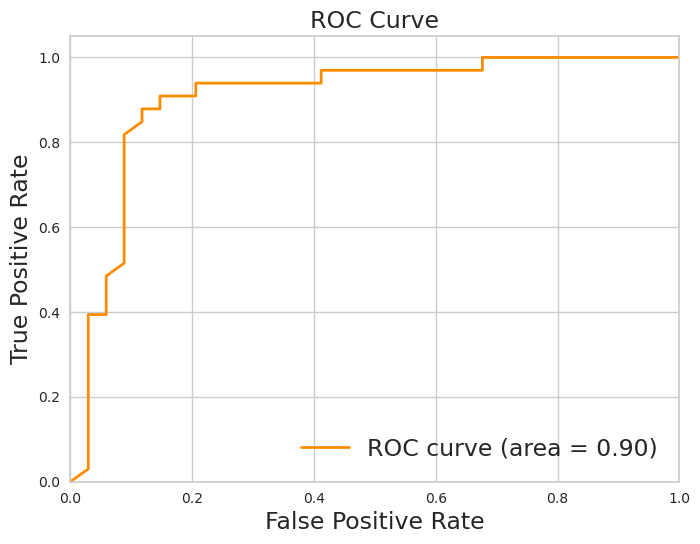

In [92]:
from sklearn import metrics
y_score = rf0.fit(X, y).predict_proba(X_test)
fpr_rf1, tpr_rf1, thresholds = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_rf1 = metrics.auc(fpr_rf1, tpr_rf1)
drawRoc('rf.svg',roc_auc_rf1, fpr_rf1, tpr_rf1)

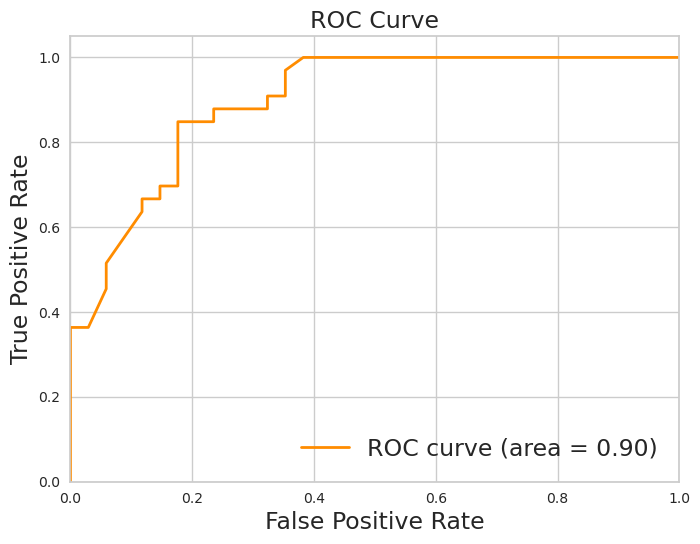

In [93]:
y_score = xgb_model.fit(X, y).predict_proba(X_test)
fpr_xgb1, tpr_xgb1, thresholds1 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_xgb1 = metrics.auc(fpr_xgb1, tpr_xgb1)
drawRoc('xgb_model.svg',roc_auc_xgb1, fpr_xgb1, tpr_xgb1)

绘制特征重要性

[0.15359409 0.0692876  0.00231918 0.02945805 0.13474151 0.18219103
 0.0894144  0.13690682 0.20208737]


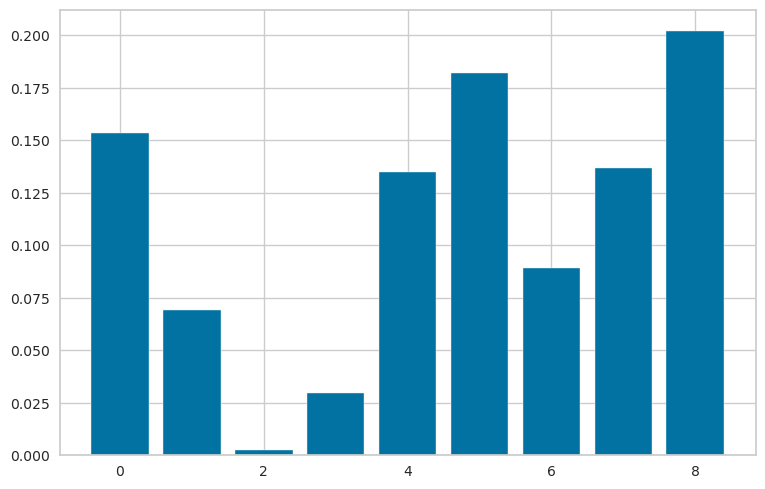

In [94]:
from matplotlib import pyplot
print(xgb_model.feature_importances_)
pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
pyplot.show()

# 1.1  对n_estimators进行参数择优

# RF参数搜索

In [95]:
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                        scoring='roc_auc',cv=10)
gsearch1.fit(X,y)
rf_best=gsearch1.best_estimator_
print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

{'n_estimators': 41}
best accuracy:0.847802


In [96]:
means = gsearch1.cv_results_['mean_test_score']
params = gsearch1.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
print(means)
print(params)



0.686538  with:   {'n_estimators': 1}
0.827198  with:   {'n_estimators': 11}
0.814835  with:   {'n_estimators': 21}
0.828297  with:   {'n_estimators': 31}
0.847802  with:   {'n_estimators': 41}
0.833791  with:   {'n_estimators': 51}
0.825824  with:   {'n_estimators': 61}
0.835714  with:   {'n_estimators': 71}
0.840110  with:   {'n_estimators': 81}
0.829121  with:   {'n_estimators': 91}
[0.68653846 0.8271978  0.81483516 0.8282967  0.8478022  0.83379121
 0.82582418 0.83571429 0.84010989 0.82912088]
[{'n_estimators': 1}, {'n_estimators': 11}, {'n_estimators': 21}, {'n_estimators': 31}, {'n_estimators': 41}, {'n_estimators': 51}, {'n_estimators': 61}, {'n_estimators': 71}, {'n_estimators': 81}, {'n_estimators': 91}]


In [97]:
def print_res(model):
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    pre=metrics.precision_score(y_test, y_pred, average='macro')
    recall=metrics.recall_score(y_test, y_pred, average='macro')
    f1=metrics.f1_score(y_test, y_pred, average='weighted')  
    print('acc: ',acc)
    print('prec: ',pre)
    print('reacall:',recall)
    print('f1: ',f1)

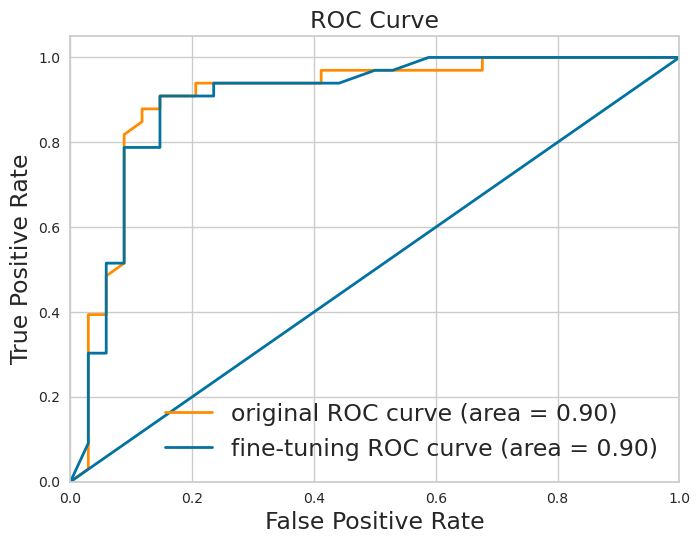

In [98]:
y_score = rf_best.predict_proba(X_test)
fpr_rf2, tpr_rf2, thresholds1 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_rf2 = metrics.auc(fpr_rf2, tpr_rf2)
drawRoc_two('rf_duibi.svg',roc_auc_rf1, fpr_rf1, tpr_rf1,roc_auc_rf2,fpr_rf2, tpr_rf2)


# XGBoost参数搜索

In [99]:
param_test1 = {"n_estimators":range(1,101,10)}
# xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 50)
xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,alpha = 10)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_test1, cv=3, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)
xgb_best = grid_search.best_estimator_
print(grid_search.best_params_)

{'n_estimators': 41}


In [100]:
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

0.644444  with:   {'n_estimators': 1}
0.670370  with:   {'n_estimators': 11}
0.707407  with:   {'n_estimators': 21}
0.700000  with:   {'n_estimators': 31}
0.718519  with:   {'n_estimators': 41}
0.714815  with:   {'n_estimators': 51}
0.714815  with:   {'n_estimators': 61}
0.711111  with:   {'n_estimators': 71}
0.707407  with:   {'n_estimators': 81}
0.707407  with:   {'n_estimators': 91}


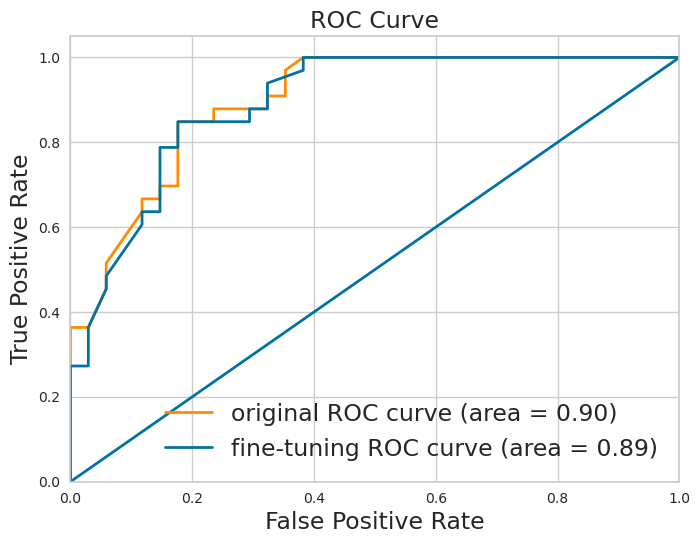

In [101]:
y_score = xgb_best.predict_proba(X_test)
fpr_xgb2, tpr_xgb2, thresholds1 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_xgb2 = metrics.auc(fpr_xgb2, tpr_xgb2)
drawRoc_two('xgb_best_tuning.g',roc_auc_xgb1, fpr_xgb1, tpr_xgb1,roc_auc_xgb2,fpr_xgb2, tpr_xgb2)

# 2.随机森林结合XGBoost

# 2.1加权平均投票法

In [102]:

def blended_predictions(X,a,y_test):
    y_pred=((a * rf_best.predict_proba(X)) + ((1-a)* xgb_best.predict_proba(X)))
    hunhe_score=[]
    for i in range(len(y_pred)):
        if y_pred[i][0]>=0.5:
            hunhe_score.append(0)
        else:
            hunhe_score.append(1)
    acc=accuracy_score(y_test, hunhe_score)
    pre=metrics.precision_score(y_test, hunhe_score, average='macro')
    recall=metrics.recall_score(y_test, hunhe_score, average='macro')
    f1=metrics.f1_score(y_test, hunhe_score, average='weighted')  
    return acc,pre,recall,f1


In [103]:
i=0
acc=[]
pre=[]
recall=[]
f1=[]
for _ in range(10):
    i=i+0.1
    acc1,pre1,recall1,f11 = blended_predictions(X_test,i,y_test)
    acc.append(acc1)
    pre.append(pre1)
    recall.append(recall1)
    f1.append(f11)
    
print('acc: ',acc)
print('prec: ',pre)
print('reacall:',recall)
print('f1: ',f1)


acc:  [0.8805970149253731, 0.8507462686567164, 0.835820895522388, 0.8208955223880597, 0.8208955223880597, 0.8208955223880597, 0.8208955223880597, 0.8208955223880597, 0.835820895522388, 0.835820895522388]
prec:  [0.8816964285714286, 0.8521505376344086, 0.8438644688644689, 0.8319444444444444, 0.8319444444444444, 0.8319444444444444, 0.8319444444444444, 0.8319444444444444, 0.8438644688644689, 0.8438644688644689]
reacall: [0.8810160427807486, 0.8502673796791445, 0.8346702317290553, 0.8195187165775402, 0.8195187165775402, 0.8195187165775402, 0.8195187165775402, 0.8195187165775402, 0.8346702317290553, 0.8346702317290553]
f1:  [0.8805438050389762, 0.8505463752665244, 0.8347148157706863, 0.8192012908430819, 0.8192012908430819, 0.8192012908430819, 0.8192012908430819, 0.8192012908430819, 0.8347148157706863, 0.8347148157706863]


# XGBRForest ROC曲线

固定参数a

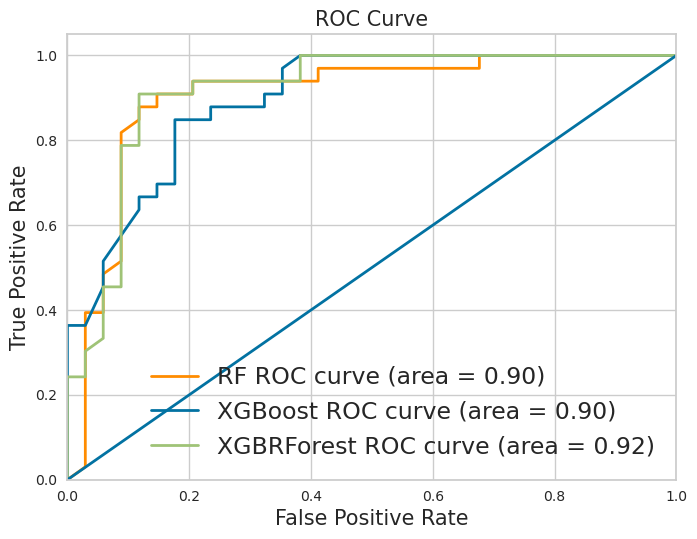

In [104]:
a=0.2
y_score=((a * rf_best.predict_proba(X_test)) + ((1-a)* xgb_best.predict_proba(X_test)))
fpr_XGBRForest, tpr_XGBRForest, thresholds1 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_XGBRForest= metrics.auc(fpr_XGBRForest, tpr_XGBRForest)
drawRoc_three('three.svg',roc_auc_rf1, fpr_rf1, tpr_rf1,roc_auc_xgb1, fpr_xgb1, tpr_xgb1,roc_auc_XGBRForest, fpr_XGBRForest, tpr_XGBRForest)

In [105]:
# fpr_XGBRForest, tpr_XGBRForest

In [106]:
hunhe_score=[]
for i in range(len(blended_score)):
    if blended_score[i][0]>=0.5:
        hunhe_score.append(0)
    else:
        hunhe_score.append(1)
print(hunhe_score)

NameError: name 'blended_score' is not defined

In [ ]:
res=accuracy_score(y_test, hunhe_score)
print(res)

# 2.2 XGBRFRegressor

In [ ]:

xgb_model = xgb.XGBRFRegressor(random_state=42).fit(
    X_train_res, y_train_res)
score=xgb_model.score(X_test, y_test)
print(score)

    

In [ ]:
import xgboost as xgb
rf = RandomForestClassifier(oob_score=True,random_state=10)
rf.fit(X,y)
# pred_rf = rf.predict(X_test).reshape(-1,1)

score=rf.score(X_test, y_test)
print(score)




# 3.混合模型

训练rf

In [ ]:
rf = RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(X_train_res, y_train_res)
print("rf before tuning score:",rf.score(X_test, y_test))

param_test1 = {"n_estimators":range(1,101,10)}
rf = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                        scoring='roc_auc',cv=10)
rf.fit(X_train_res, y_train_res)

print("rf after tuning score:",rf.score(X_test, y_test))




训练XGB

In [ ]:
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}
xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=3, n_jobs=-1)
# grid_search.fit(X_train_res, y_train_res)
# xgb_best = grid_search.best_estimator_

# score=xgb_best.score(X_test, y_test)
# print("xgb_best acc:",score)

In [ ]:
pred_rf = rf.predict(X_train_res)
xgb_input_train = np.column_stack((X_train_res, pred_rf))
xgb_input_test = np.column_stack((X_test, rf.predict(X_test)))
# xgb_best.fit(xgb_input_train, y_train)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=3, n_jobs=-1)
grid_search.fit(xgb_input_train, y_train_res)
xgb_best = grid_search.best_estimator_


In [ ]:
xgb_best.score(xgb_input_test, y_test)

# 4.采用XGBoost训练随机森林中每个决策树的权重

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练随机森林模型
rf.fit(X_train_res, y_train_res)

# 计算随机森林模型的得分
rf_score = rf.score(X_test, y_test)

# 定义XGBoost模型
xgb_model = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)

# 使用XGBoost分类训练随机森林中每个决策树的权重
xgb_model.fit(X_train_res, y_train_res, base_margin=rf.predict_proba(X_train_res)[:,1]-0.5)
# xgb_model.fit(X_train_res, y_train_res)
# 计算混合模型的得分
blended_score = accuracy_score(y_test, xgb_model.predict(X_test))

# 输出得分
print("Random Forest Score: ", rf_score)
print("Blended Model Score: ", blended_score)

In [ ]:
# rf.predict_proba(X_train_res)[:,1]

In [ ]:
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
# xgb_model.fit(X_train_res, y_train_res)
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train_res, y_train_res, base_margin=xgb_model.predict_proba(X_train_res)[:,1])
# blended_score = accuracy_score(y_test, rf.predict(X_test))


In [ ]:
y_pred = xgb_best.predict(xgb_input_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

# Comparing Classification Models

In [ ]:
# combine X_train_res and y_train_res
train_data = pd.concat([X_train_res, y_train_res], axis=1)

In [ ]:
from pycaret.classification import *
s = setup(data=train_data, target='labels', session_id=123, normalize=True)

In [ ]:
compare_models()

In [ ]:
xg = create_model('xgboost')

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(xg, X_train_res, y_train_res, cv=20)

In [ ]:
from xgboost import plot_tree, to_graphviz
import matplotlib.pyplot as plt
import matplotlib

plot_tree(xg, num_trees=2, rankdir='LR')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)


# Predictions

In [ ]:
preds = predict_model(xg)

In [ ]:
preds

# ROC Curve


In [ ]:
sns.set(font_scale=1)
plot_model(xg)

# Error Plot

In [ ]:
plot_model(xg, plot = 'error')

# Learning Curve

In [ ]:
plot_model(xg, plot = 'learning')

# Validation Curve

In [ ]:
plot_model(xg, plot = 'vc')

# Thank You!

---
